In [1]:
from entities import *
from constants import TEAMS_DATA, STAT_EFFECTS, POSSESSIONS_STD_DEV
from simulations import *

import pickle
import numpy as np
import pandas as pd

In [2]:
with open(TEAMS_DATA, 'rb') as f:
    teams = pickle.load(f)

with open(STAT_EFFECTS, 'rb') as f:
    stats = pickle.load(f)

In [4]:
test = simulate_n_games(teams['Kansas'], teams['Connecticut'], 500)

Simulating Game: Kansas vs. Connecticut


100%|██████████| 500/500 [00:07<00:00, 66.06it/s]

Kansas vs. Connecticut Complete!


In [5]:
test['Record']

'Kansas: 235 - 265 :Connecticut'

In [6]:
test['Contributions']

,Team,2P,3P,BLK,STL,TOV,ORB,DRB,PF,Games Played
Elmarko Jackson,Kansas,522,392,330,201,660,73,1119,1119,274
Flory Bidunga,Kansas,3230,0,1294,269,943,1402,3289,1240,402
Jamari McDowell,Kansas,65,728,137,393,472,137,1003,806,294
Kohl Rosario,Kansas,744,613,140,281,543,543,683,1227,300
Tre White,Kansas,1361,684,207,310,1061,1165,2563,1320,386
Alex Karaban,Connecticut,1522,1048,617,470,352,941,1882,1205,438
Eric Reibe,Connecticut,2719,208,901,208,554,970,2241,1456,344
Jayden Ross,Connecticut,793,579,373,513,279,583,1236,1749,348
Jaylin Stewart,Connecticut,973,586,385,514,643,514,2084,1312,384
Solomon Ball,Connecticut,1645,1130,160,453,801,400,1468,1068,397


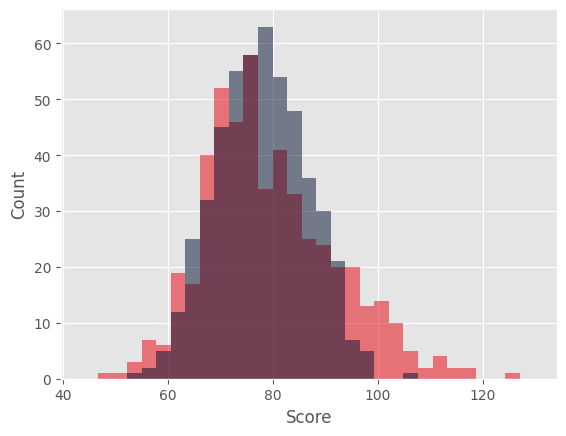

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot')

kansas = test['Scores']['Kansas']
uconn = test['Scores']['Connecticut']

min_score = min(kansas + uconn)
max_score = max(kansas + uconn)
bins = np.linspace(min_score-5, max_score+5, 32)

plt.hist(kansas, bins=bins, color='#e8000d', alpha=0.5)
plt.hist(uconn, bins=bins, color='#000E2F', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()